
# MLG382 GROUP PROJECT  [100 Marks] 
**Lecturer: _K. Igwe_**


# Your task is to predict *median house values* in Western cape, given a number of features from the districts 


The first question to ask before building a model is what exactly the business objective is. How does the client expect to use and benefit from the model? The objective is important in determining how you will frame the problem, the algorithms to select, the performance measure to use for your model evaluation, and the level of effort you will spend tweaking your model.

In this project, you should assume that your model’s output (a prediction of a district’s median housing price) will be fed to
another Machine Learning system along with many other determinats to better understand the risk of investing in a given area of the Western Cape. The data (home.csv) are provided alonside this notebook. 

This checklist can guide you through the projects.
1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.

### Aim
- Lecturers aim: To expose you to practical applications of ML. 
- Your aim:  to predict median house values in Western cape, given a number of features from the province. 

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- choosing the right model and Building a classification Model
- Understanding and using different evaluation techniques
- Reporting 

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

### NOTE: 80% is for meeting requirement, 20% will be awarded based on extra work. I have provided some guide where I enticipate that you may need extra help.

In [1]:
# GROUP MEMBERS NAMES HERE (as markdown)
# Jarryd Lyle Dass
# Nehal Mohanlal (578167@student.belgiumcampus.ac.za)
# Benjamin Pillay 
# Lesedi Mbele 
# Charl Wehrs 


## RUBRIC

1. Frame the problem and look at the big picture (done for you) [2].
2. Get the data (made available for you) [2].
3. Explore the data to gain insights [10]
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]
5. Explore many different models (at least 3) and shortlist the best ones [30].
6. Fine-tune your models. [10]
7. Present your solution [20].

##  Frame the problem and look at the big picture (done for you).

In [2]:
# Nothing Required here. Good Luck!

In [4]:
#importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 




## Get the data (made available for you) [0].

In [9]:
# _your code here_ 
data = pd.read_csv('home.csv')

## Explore the data to gain insights [10] BONUS [5]

#### hints!
- check for correlations: features with the label. And features with one another
- use graphs to illustrate similarities and differences as you deem neccessary
- NOTE: Features with non-linear relationships will have little or no correlation but may still be very instrumental in your predictions
- Test combinations of features (for example, new feature = old_feature1/old_feature2 )

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [13]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
data.shape

(20640, 10)

In [16]:
duplicated = data[data.duplicated()]
duplicated # no duplicated rows  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]

In [17]:
# take care of null values 
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


In [18]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


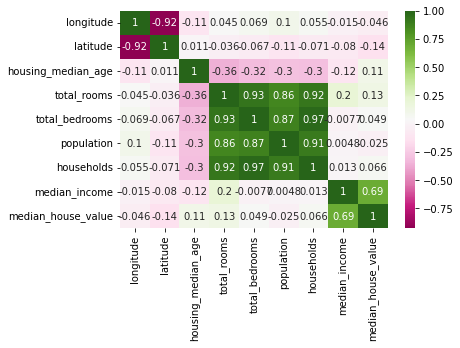

In [20]:
corelation = data.corr() 
sns.heatmap(corelation, cmap = 'PiYG', annot = True) 
corelation

#### hint!
- remove the corresponding districts.
- remember to deal with th NA's (you can as well do this before now)
- Scale, Normalize, transform some features (e.g., median income can be put into categroies).
- Set the values to some value (zero, the mean, the median, etc.).


In [5]:
# _your code here_

 ## Explore many different models (at least 3) and shortlist the best ones [20] Bonus [5]

#### hint!
- Some with cross_validation
- Tree based models
- Non- Tree based Models
- (don't worry too much about tuning here)

In [6]:
# _your code here_

 ## Fine-tune your models [10] BONUS [10]

#### hint!
- We manually tuned our model in the class (this is not efficient)

try:
- GridSearchCV from sklearn (self-improvement)
- esemble methods
- evaluate your models on the test set

In [7]:
# _your code here_

## Present your solution [20].

#### hint!
- you do not need machine learning knowledge to write a report
- Report your choosen solution and justify it

In [8]:
# _your Report here_

### ADVISE: Let your objective not be to obtain marks but to understand, experiment and experience! 

### Congratulations! You have achieved a lot if you have completed this project deligently